In [1]:
import pandas as pd
import datetime
import random
import numpy as np
from random import randint
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

order = pd.read_csv('../../2_data/explored/order.csv')
item = (pd.read_csv('../../2_data/explored/order_item.csv'))
product = pd.read_csv('../../2_data/explored/product.csv')


In [2]:
order['CREATE_DATE'] = order['CREATE_DATE'].astype('datetime64[ns]')
order

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING
5,2442,4462,1100702709,2015-10-18 15:41:07,2015-10-18 15:50:14,PENDING
6,2481,2509,1100605014,2015-10-18 20:50:15,2015-10-18 20:58:13,PAID_SUCCESS
7,2561,2784,1100686150,2015-10-20 13:37:30,2015-10-20 13:45:41,PENDING
8,2641,5509,1100703880,2015-10-22 13:34:21,2015-10-22 13:44:58,PENDING
9,2682,5805,1100704086,2015-10-23 13:38:16,2015-10-23 13:38:16,PENDING


In [3]:
product

,MATNR,MAKTX,DEPT_ID1,MVGR1,MVGR2,MVGR3,MVGR4,MVGR5,MVGR6,MVGR7,STY_ID,META_K
0,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว,1.0,14,A20,2.0,70,J9,01,9.0,14.0,"SB,KONCEPT FURNITURE,Patisia,ชุดห้องนอน,โต๊ะ/ต..."
1,19045101,โซฟาCANNERY/นต.HE51-12/เหลือง-ลายทาง/3S,3.0,10,059,35.0,59,B2,32,8.0,6.0,"SB,SB FURNITURE,Cannery,Sofa Fabric,โซฟา 3 ที่..."
2,19050282,VPกรอบรูป#HD5937A/ไม้ขัดสี,6.0,19,,51.0,B4,,58,23.0,14.0,"SB,VINTAGE PASSION,,กรอบรูปและภาพแขวน,กรอบรูป,"
3,59000365,Bedroom/Meudon 6'&Isis/Wenge,1.0,14,598,2.0,CD,05,D6,9.0,3.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Meudo..."
4,59001810,Bedroom/ALicia-E 6'&Meudon/White/Re,1.0,14,466,2.0,CD,05,01,9.0,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Alici..."
5,19049900,โซฟาSANTANA/SLขาวกุ๊นดำ/มุม(ขวา),3.0,14,HN6,38.0,62,B2,01,21.0,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Santa..."
6,19040929,โซฟาBELLA(62-3)/หนังแท้/SL/นต.(ZP-15)/3S,3.0,10,755,38.0,59,B3,33,10.0,9.0,"SB,SB FURNITURE,Bella,โซฟาหนังสังเคราะห์,โซฟา ..."
7,19045046,โซฟาJOVI#AS-S077/ดำ/4S,3.0,10,207,35.0,60,B2,06,8.0,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,SB,เอส.บี,เฟอร์นิเจอร์ ..."
8,19045211,GRAZIA I/เตียง5'/E/วอลนัท/เบาะครีม,1.0,14,543,2.0,02,04,37,9.0,3.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Grazi..."
9,59000343,Bedroom/Koloze-B 6'&Foresta/Walnut,1.0,14,576,2.0,,,37,NaN,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Koloz..."


In [4]:
item

,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0
5,2341,2302,19086655,1,3490.0
6,2422,2382,19104920,1,6900.0
7,2442,2403,19062438,1,18500.0
8,2481,2421,19110830,1,9900.0
9,2561,2483,19077657,1,22400.0


In [5]:

new_product = product.copy()

del new_product['MVGR1']
del new_product['MVGR2']
del new_product['MVGR3']
del new_product['MVGR4']
del new_product['MVGR5']
del new_product['MVGR6']
del new_product['MAKTX']
del new_product['DEPT_ID1']
del new_product['MVGR7']
del new_product['STY_ID']
del new_product['META_K']


new_product.head()

,MATNR
0,19047936
1,19045101
2,19050282
3,59000365
4,59001810


In [6]:
data_all =pd.merge(new_product, item, on='MATNR', how='outer')
data_all.head()

,MATNR,ORDER_ID,ORDER_ITEM_ID,QUANTITY,TOTAL_PRICE
0,19047936,2781.0,2702.0,1.0,1050.0
1,19047936,3561.0,3482.0,1.0,1050.0
2,19047936,2761.0,2684.0,1.0,1050.0
3,19047936,7561.0,7162.0,1.0,1050.0
4,19047936,12821.0,11782.0,1.0,1050.0


In [7]:
min_to_max2 = (max(order['CREATE_DATE'])-min(order['CREATE_DATE'])).days
min_to_max2

837

split ข้อมูลออกเป็น 70:30

In [288]:
def split_data(df,ps_trian,sample_number):
    min_to_max = (max(df['CREATE_DATE'])-min(df['CREATE_DATE'])).days
    train_point = (min_to_max*ps_trian)/100
    test_point = int(min_to_max -train_point)
    
    date_between = max(df['CREATE_DATE'])-datetime.timedelta(days=test_point)
    train_data = df[df['CREATE_DATE']<date_between]
    test_data = df[df['CREATE_DATE']>=date_between]
    
    x = train_data['CUSTOMER_ID'].unique()
    y = test_data['CUSTOMER_ID'].unique()
    
    #sample from train data
    sample_customer_id = np.unique(random.sample(population=list(x), k=sample_number))
    sample_order = train_data[train_data['CUSTOMER_ID'].isin(list(sample_customer_id))]
    
    #sample from test data
    sample_test = test_data[test_data['CUSTOMER_ID'].isin(list(sample_customer_id))]
    order_item = pd.merge(sample_order, data_all,how='outer', on='ORDER_ID')
    test_item = pd.merge(sample_test, data_all,how='outer', on='ORDER_ID')
    
   
    
    new_train_item = order_item.copy()
    new_test_item = test_item.copy()
    del new_train_item['BPCODE']
    del new_train_item['CREATE_DATE']
    del new_train_item['UPDATE_DATE']
    del new_train_item['STATUS']
    del new_train_item['TOTAL_PRICE']
    del new_train_item['ORDER_ID']
    del new_train_item['ORDER_ITEM_ID']
    
    del new_test_item['BPCODE']
    del new_test_item['CREATE_DATE']
    del new_test_item['UPDATE_DATE']
    del new_test_item['STATUS']
    del new_test_item['TOTAL_PRICE']
    del new_test_item['ORDER_ID']
    del new_test_item['ORDER_ITEM_ID']
    
    
    
    
    print ('Unique Train:',len(x))
    print ('Unique Test:',len(y))
    print ('sample_customer_id:',len(sample_customer_id))
    print ('sample_order:',len(sample_order))
    print ('order_item:',len(order_item))
    print ('test_item:',len(test_item))
    
    
    grouped_train = new_train_item.groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
    grouped_test = new_test_item.groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()

    grouped_train['QUANTITY'] =1
    grouped_test['QUANTITY'] =1
    
    pivot = grouped_train.pivot(index='CUSTOMER_ID', columns='MATNR', values='QUANTITY')
    print(pivot.shape)
    
    return [pivot,grouped_test]
    
    
   
    
    


In [247]:
[sample_pivot_table,test] = split_data(order,70,200)

Unique Train: 3711
Unique Test: 3076
sample_customer_id: 200
sample_order: 384
order_item: 41321
test_item: 41321
(200, 391)


# Model
Cosine correlation

In [248]:
def cosine_similarity(table):
    from sklearn.metrics.pairwise import cosine_similarity
    sample_pivot_table[np.isnan(table)] = 0
    user_sim = cosine_similarity(table)
    return user_sim



In [249]:
df_corr = cosine_similarity(sample_pivot_table)
df_corr

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11952286],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.11470787],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11952286, 0.        , 0.11470787, ..., 0.        , 0.        ,
        1.        ]])

กำหนดให้ ความสัมพันธ์ของตัวเองเป็น0

In [250]:
np.fill_diagonal(df_corr, 0 )
df_corr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11952286],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11470787],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11952286, 0.        , 0.11470787, ..., 0.        , 0.        ,
        0.        ]])

In [251]:
pivot_corr = pd.DataFrame(df_corr, columns=sample_pivot_table.index.values, index=sample_pivot_table.index)
pivot_corr

,2412.0,2716.0,4264.0,5066.0,7283.0,7484.0,8885.0,10364.0,10743.0,11632.0,...,122462.0,122665.0,123503.0,123592.0,123702.0,124783.0,127626.0,128222.0,129362.0,129982.0
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
2412.0,0.000000,0.0,0.000000,0.0,0.0,0.059761,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119523
2716.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4264.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.114708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114708
5066.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7283.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7484.0,0.059761,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8885.0,0.000000,0.0,0.114708,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10364.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10743.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [252]:
links = pivot_corr.stack().reset_index()
links.columns = ['User1', 'User2','value']
links

,User1,User2,value
0,2412.0,2412.0,0.000000
1,2412.0,2716.0,0.000000
2,2412.0,4264.0,0.000000
3,2412.0,5066.0,0.000000
4,2412.0,7283.0,0.000000
5,2412.0,7484.0,0.059761
6,2412.0,8885.0,0.000000
7,2412.0,10364.0,0.000000
8,2412.0,10743.0,0.000000
9,2412.0,11632.0,0.000000


In [253]:
links_filtered=links.loc[ (links['value'] > 0.1) & (links['User1'] != links['User2']) ]
links_filtered

,User1,User2,value
19,2412.0,18442.0,0.169031
27,2412.0,24709.0,0.169031
28,2412.0,24805.0,0.169031
33,2412.0,27209.0,0.169031
69,2412.0,47787.0,0.169031
102,2412.0,77987.0,0.119523
105,2412.0,78922.0,0.169031
111,2412.0,81691.0,0.169031
114,2412.0,82165.0,0.119523
120,2412.0,84622.0,0.169031


# Select from thershold

In [254]:
def prefiltering_of_neighbors(old_similar_table, thershold):
    new_similar_table = old_similar_table.copy()
    # Negative filtering & Thershold filtering
    new_similar_table[new_similar_table < thershold] = 0
    return new_similar_table

In [255]:
pivot_thershold = prefiltering_of_neighbors(pivot_corr, 0.1)
pivot_thershold

,2412.0,2716.0,4264.0,5066.0,7283.0,7484.0,8885.0,10364.0,10743.0,11632.0,...,122462.0,122665.0,123503.0,123592.0,123702.0,124783.0,127626.0,128222.0,129362.0,129982.0
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
2412.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119523
2716.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4264.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.114708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114708
5066.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7283.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7484.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8885.0,0.000000,0.0,0.114708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10364.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10743.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# prediction

In [256]:
def cs_classification_predicted_score_user_based(pivot_table,weight,output_set):
    # initial variable
    score_table = pivot_table.copy()
    number_of_user = score_table.shape[0]
    
    # get NaN index
    nan_index = np.argwhere(np.isnan(score_table).values)
    
    # for loop to predict each NaN and fill value to it       
    for nan_pos in nan_index:
        r_score = np.array([])
        u,i = nan_pos[0],nan_pos[1]
        ru = score_table.values[:,i]
        wu = weight.values[u]
        wu[u] = 0
        
        for r in output_set:
            r_array,delta_r = np.array([r]*number_of_user),np.array([0]*number_of_user)
            delta_r[r_array == ru]  = 1
            vir = sum(wu*delta_r)
            r_score = np.append(r_score, vir)
        
        score_table.values[u][i] = output_set[np.argmax(r_score)]
        
    return score_table

In [257]:
similarity_weight = cosine_similarity(sample_pivot_table)
prefiltering_sw = prefiltering_of_neighbors(similarity_weight, 0.1)
predicted_table = cs_classification_predicted_score_user_based(sample_pivot_table,prefiltering_sw,[0,1])

In [258]:
predicted_table.head()

MATNR,19008833,19009152,19012992,19013319,19014268,19014291,19014714,19015906,19023002,19024114,...,59012672,59012673,59013025,59013202,59013519,59013606,59013806,59013828,59013969,59014252
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
2412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2716.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
predicted_table_T = predicted_table.T

In [260]:
np.unique(predicted_table)

array([0., 1.])

In [261]:
def item_list_from_user(predicted_score_table,user_id):
    user_items = pd.DataFrame(predicted_score_table.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted.index.values
    return item_id_lists

def new_item_list_from_user(new_score_table, old_score_table, user_id):
    only_new_item = new_score_table[np.isnan(old_score_table)]
    print(only_new_item)
    user_items = pd.DataFrame(only_new_item.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted[(user_items_sorted>0).values].index.values
    return item_id_lists

def user_list_from_similarity(similar_table,item_id):
    item_lists = pd.DataFrame(similar_table.loc[item_id])
    items_sorted = item_lists.sort_values(by=[item_id], ascending=False)
    items_sorted[item_id][item_id] = 0
    item_id_lists = items_sorted[(items_sorted>0).values].index.values
    return item_id_lists

In [262]:
similarity_weight = cosine_similarity(sample_pivot_table)
prefiltering_sw = prefiltering_of_neighbors(similarity_weight, 0.1)
predicted_table = cs_classification_predicted_score_user_based(sample_pivot_table,prefiltering_sw,[0,1])

 # Evaluated

In [264]:
[sample_pivot_table,test] = split_data(order,70,100)
similarity_weight = cosine_similarity(sample_pivot_table)
prefiltering_sw = prefiltering_of_neighbors(similarity_weight, 0.1)
predicted_table =  cs_classification_predicted_score_user_based(sample_pivot_table,prefiltering_sw,[0,1])

Unique Train: 3711
Unique Test: 3076
sample_customer_id: 100
sample_order: 158
order_item: 41321
test_item: 41321
(100, 179)


True positive

In [265]:
def True_positive(prediction,test):
    predict = pd.DataFrame(prediction.unstack()).groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
    predicted_item = predict[predict[0]==1]
    result = len(pd.merge(test, predicted_item, how='inner', on=['CUSTOMER_ID', 'MATNR']))
    return result

In [266]:
True_positive(predicted_table,test)

2

False Positive

In [267]:
def false_positive(predicted_pivot, test):
    predicted_table = pd.DataFrame(predicted_pivot.unstack()).groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
    predicted_item = predicted_table[predicted_table[0]==1]
    upper = pd.merge(predicted_item, test, how='left', on=['CUSTOMER_ID','MATNR'])
    return sum(np.isnan(upper['QUANTITY']))

In [268]:
false_positive(predicted_table,test)

197

False Negative

In [269]:
def false_negative(predicted_pivot, test):
    predicted_table = pd.DataFrame(predicted_pivot.unstack()).groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
    predicted_item = predicted_table[predicted_table[0]==1]
    upper = pd.merge(test, predicted_item, how='left', on=['CUSTOMER_ID','MATNR'])
    return sum(np.isnan(upper[0]))

In [270]:
false_negative(predicted_table, test)

9

Precision

In [271]:
def Precision(predicted_pivot, test):
    precision = True_positive(predicted_pivot,test)/(True_positive(predicted_pivot,test)+false_positive(predicted_pivot, test))
    return precision

In [272]:
Precision(predicted_table,test)

0.010050251256281407

Recall

In [273]:
def Recall(predicted_pivot, test):
    recall = True_positive(predicted_pivot,test)/(True_positive(predicted_pivot,test)+false_negative(predicted_pivot, test))
    return recall

In [274]:
Recall(predicted_table, test)

0.18181818181818182

In [275]:
for r in range(0,100,10):
    
    print(r)
    

0
10
20
30
40
50
60
70
80
90


In [276]:
precision_array = np.array([])
recall_array = np.array([])
mean_of_threshold_precision = []
mean_of_threshold_recall=[]
n=0.1

for k in range(10):
    for i in range(10):
        [sample_pivot_table,test] = split_data(order,70,randint(200, 500))
        similarity_weight = cosine_similarity(sample_pivot_table)
        prefiltering_sw = prefiltering_of_neighbors(similarity_weight,n)
        predicted_table1 = cs_classification_predicted_score_user_based(sample_pivot_table,prefiltering_sw,[0,1])
        precision_array = np.append(precision_array,Precision(predicted_table1,test))
        recall_array = np.append(recall_array,Recall(predicted_table1,test))
        n += 0.03
        print (i)
        

array_range1 = precision_array[:10]
mean1 = np.mean(array_range1)

array_range2 = precision_array[10:20]
mean2 = np.mean(array_range2)

array_range3 = precision_array[20:30]
mean3 = np.mean(array_range3)

array_range4 = precision_array[30:40]
mean4 = np.mean(array_range4)

array_range5 = precision_array[40:50]
mean5 = np.mean(array_range5)

array_range6 = precision_array[50:60]
mean6 = np.mean(array_range6)

array_range7 = precision_array[60:70]
mean7 = np.mean(array_range7)

array_range8 = precision_array[70:80]
mean8= np.mean(array_range8)

array_range9 = precision_array[80:90]
mean9 = np.mean(array_range9)

array_range10 = precision_array[90:]
mean10 = np.mean(array_range10)


array_range1_re = recall_array[:10]
mean1_re = np.mean(array_range1_re)

array_range2_re = recall_array[10:20]
mean2_re = np.mean(array_range2_re)

array_range3_re = recall_array[20:30]
mean3_re = np.mean(array_range3_re)

array_range4_re = recall_array[30:40]
mean4_re = np.mean(array_range4_re)

array_range5_re = recall_array[40:50]
mean5_re = np.mean(array_range5_re)

array_range6_re = recall_array[50:60]
mean6_re = np.mean(array_range6_re)

array_range7_re = recall_array[60:70]
mean7_re = np.mean(array_range7_re)

array_range8_re = recall_array[70:80]
mean8_re= np.mean(array_range8_re)

array_range9_re = recall_array[80:90]
mean9_re = np.mean(array_range9_re)

array_range10_re = recall_array[90:]
mean10_re = np.mean(array_range10_re)
    
mean_of_threshold_precision.append((mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10))
mean_of_threshold_recall.append((mean1_re,mean2_re,mean3_re,mean4_re,mean5_re,mean6_re,mean7_re,mean8_re,mean9_re,mean10_re))


Unique Train: 3711
Unique Test: 3076
sample_customer_id: 471
sample_order: 851
order_item: 41321
test_item: 41321
(471, 747)
0
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 345
sample_order: 585
order_item: 41322
test_item: 41321
(344, 520)
1
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 258
sample_order: 437
order_item: 41321
test_item: 41321
(258, 468)
2
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 443
sample_order: 697
order_item: 41322
test_item: 41321
(443, 599)
3
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 217
sample_order: 440
order_item: 41321
test_item: 41321
(217, 409)
4
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 458
sample_order: 723
order_item: 41321
test_item: 41321
(458, 639)
5
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 328
sample_order: 529
order_item: 41321
test_item: 41321
(328, 527)
6
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 375
sample_order: 641
order_item: 41321
test_item: 413

4
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 323
sample_order: 556
order_item: 41322
test_item: 41321
(323, 531)
5
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 374
sample_order: 670
order_item: 41321
test_item: 41321
(374, 609)
6
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 330
sample_order: 585
order_item: 41321
test_item: 41321
(330, 537)
7
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 391
sample_order: 689
order_item: 41323
test_item: 41321
(390, 606)
8
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 420
sample_order: 702
order_item: 41323
test_item: 41321
(419, 655)
9
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 373
sample_order: 672
order_item: 41323
test_item: 41321
(373, 641)
0
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 471
sample_order: 790
order_item: 41321
test_item: 41321
(471, 662)
1
Unique Train: 3711
Unique Test: 3076
sample_customer_id: 349
sample_order: 637
order_item: 41322
test_item: 4

In [241]:
mean_of_threshold_precision = np.array(mean_of_threshold_precision)
mean_of_threshold_precision
for p in mean_of_threshold_precision:
    print(p)



[0.00540312 0.00593853 0.00403717 0.005379   0.00386575 0.00379645
 0.00405084 0.0039917  0.00422148 0.00311967]


In [242]:
mean_of_threshold_recall = np.array(mean_of_threshold_recall)
for r in mean_of_threshold_recall:
    print(r)

[0.05422703 0.05905247 0.04858762 0.07190263 0.0467442  0.04434638
 0.044482   0.05017358 0.05727345 0.03643927]


In [243]:
F1score = (p*r)/(p+r)
#F1score[np.isnan(F1score)] = 0
F1score

array([0.00491354, 0.0053959 , 0.00372745, 0.00500461, 0.00357048,
       0.00349707, 0.00371273, 0.00369754, 0.00393169, 0.00287365])

Plot

<function matplotlib.pyplot.show>

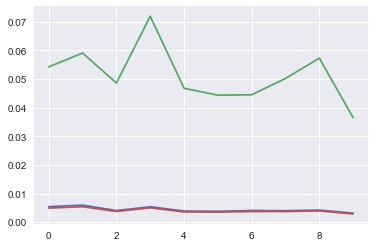

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.plot(p)
plt.plot(r)
plt.plot(F1score)

plt.show
